In [2]:
# Quickly compare historical fgco2 global with piControl and publshed TS to check I  am doing it right

import netCDF4
import os
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import cartopy.crs as ccrs
import numpy as np
import scipy.interpolate.ndgriddata as ndgriddata
import matplotlib.gridspec as gridspec

%matplotlib inline

In [3]:
hist_file = '/bdd/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r1i1p1f1/Omon/fgco2/gn/latest/fgco2_Omon_IPSL-CM6A-LR_historical_r1i1p1f1_gn_185001-201412.nc'
# picon_file = '/data/mmenary/fgco2/fgco2_temp.nc'
picon_file = '/thredds/ipsl/mmenary/fgco2/fgco2_temp.nc'

In [4]:
loaded = netCDF4.Dataset(hist_file)
fgco2_hist = loaded.variables['fgco2'][:, :-1, 1:-1]
nav_lat = loaded.variables['nav_lat'][:-1, 1:-1]
nav_lon = loaded.variables['nav_lon'][:-1, 1:-1]
area = loaded.variables['area'][:-1, 1:-1]

loaded2 = netCDF4.Dataset(picon_file)
fgco2_picon = loaded2.variables['fgco2'][:2000, :-1, 1:-1]

In [5]:
hist_ts = np.sum(np.sum(fgco2_hist * area[np.newaxis, :, :], axis=2), axis=1) * (60 * 60 * 24 * 365) / 1e12

picon_ts = np.sum(np.sum(fgco2_picon * area[np.newaxis, :, :], axis=2), axis=1) * (60 * 60 * 24 * 365) / 1e12

picon_mean = picon_ts.mean()

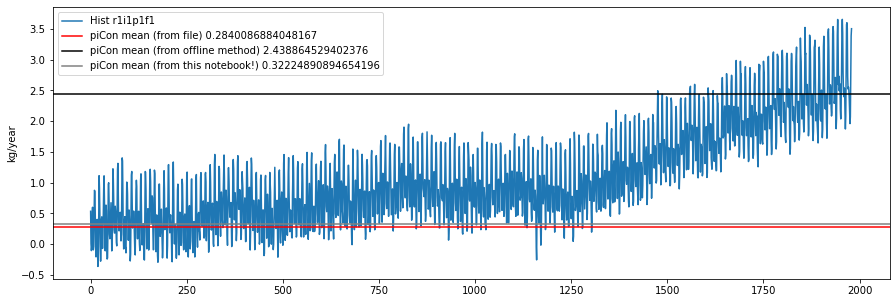

In [8]:
picon_true = 0.2840086884048167
picon_offline = 2.438864529402376

plt.figure(figsize=(15, 5))
plt.plot(hist_ts, label='Hist r1i1p1f1')
plt.axhline(picon_true, color='red', label='piCon mean (from file) %s'%picon_true)
plt.axhline(picon_offline, color='black', label='piCon mean (from offline method) %s'%picon_offline)
plt.axhline(picon_mean, color='grey', label='piCon mean (from this notebook!) %s'%picon_mean)
plt.ylabel('kg/year')
plt.legend()